# Parfit Examples

Note:

1. You can either use **bestFit** to automate the steps of the process, and optionally plot the scores over the parameter grid, OR you can do each step in order: 

> `fitModels` -> `scoreModels` -> `plotScores` -> `getBestModel` -> `getBestScore`

or for cross-valdation

> `crossvalModels` -> `plotScores` -> `getBestModel` -> `getBestScore`

Traditional imports to create our models:

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier, LogisticRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import roc_auc_score, recall_score, mean_squared_error

New imports we need to run our code

In [2]:
from parfit.parfit import bestFit
from parfit.fit import *
from parfit.score import *
from parfit.plot import *
from parfit.crossval import *

# Scoring on a defined validation set

## Classification Models

### Generating data

In [3]:
X_train = pd.DataFrame({'x_norm': np.random.normal(0,1,10000), 'x_unif': np.random.uniform(-1,1,10000), 'x_exp': np.random.exponential(1, 10000)})
y_train = np.asarray([1 if xMax > 1 else 0 for xMax in np.max(X_train, axis=1)])
X_val = pd.DataFrame({'x_norm': np.random.normal(0,1,10000), 'x_unif': np.random.uniform(-1,1,10000), 'x_exp': np.random.exponential(1, 10000)})
y_val = np.asarray([1 if xMax > 1 else 0 for xMax in np.max(X_val, axis=1)])

In [4]:
X_train.head()

,x_exp,x_norm,x_unif
0,0.521361,-0.717993,-0.642566
1,0.606078,1.026129,0.972191
2,0.351468,1.151158,-0.139426
3,0.042726,1.064008,0.254654
4,0.220781,-0.268438,0.848455


In [5]:
y_train[0:5]

array([0, 1, 1, 1, 0])

### Varying one parameter (LogisticRegression)

In [6]:
lr_grid = {
    'C': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
             1e-4, 1e-3, 1e-2, 1e-1, 1e0,
             1e1, 1e2, 1e3, 1e4, 1e5,
             1e6, 1e7, 1e8, 1e9, 1e10],
    'penalty': ['l2'],
    'n_jobs': [-1]
}
lr_paramGrid = ParameterGrid(lr_grid)

In [7]:
lr_models = fitModels(LogisticRegression(), lr_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0183s.) Setting batch_size=20.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished


In [8]:
lr_scores = scoreModels(lr_models, X_val, y_val, metric=recall_score, predict_proba=False)

[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.2s finished


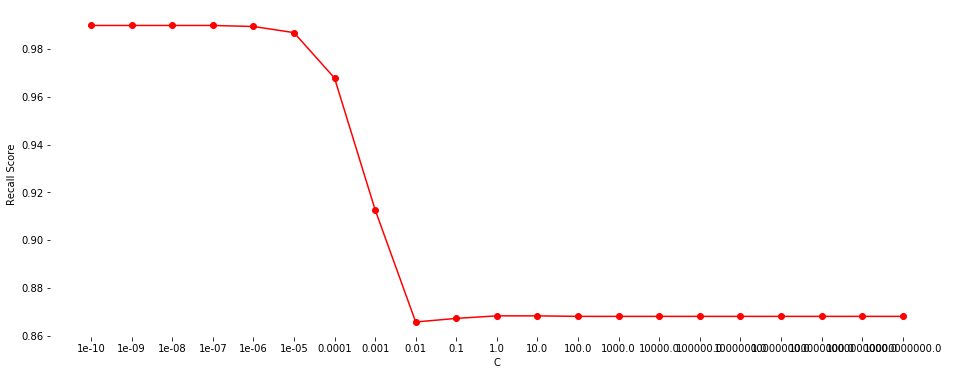

In [9]:
plotScores(lr_scores, lr_paramGrid, 'Recall Score')

In [10]:
getBestModel(lr_models, lr_scores, greater_is_better=True)

LogisticRegression(C=1e-10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
getBestScore(lr_scores, greater_is_better=True)

0.9897654584221749

Or, in one line of code!

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0178s.) Setting batch_size=22.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.2s finished


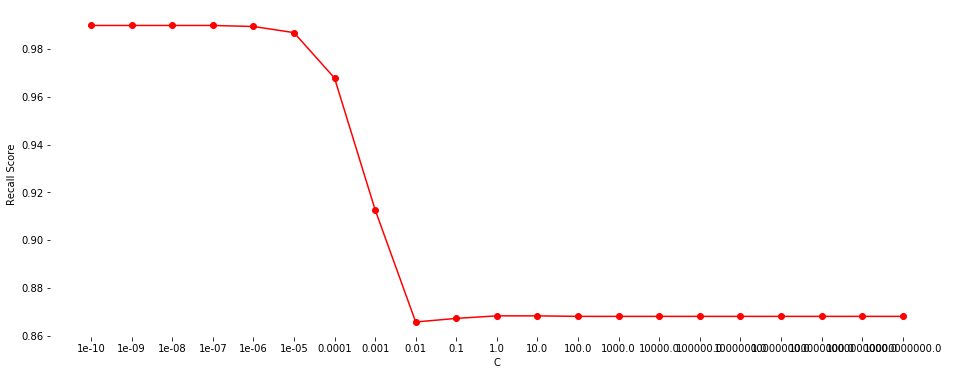

LogisticRegression(C=1e-10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 0.9897654584221749


In [12]:
lr_bestModel, lr_bestScore, lr_allModels, lr_allScores = bestFit(LogisticRegression(), lr_paramGrid, 
                                                   X_train, y_train, X_val, y_val, 
                                                   metric=recall_score, greater_is_better=True, 
                                                   predict_proba=False, scoreLabel = 'Recall Score')
print(lr_bestModel, lr_bestScore)

### Varying two parameters (Random Forest Classifier)

In [13]:
rf_grid = {
    'n_estimators': [50],
    'min_samples_leaf': [1,3,5,10,15,25,50,75,100],
    'max_features': ['sqrt', 'log2', 0.4, 0.5, 0.6],
    'n_jobs': [-1]
}
rf_paramGrid = ParameterGrid(rf_grid)

In [14]:
rf_models = fitModels(RandomForestClassifier(), rf_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed:    2.0s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:    2.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.5s finished


In [15]:
rf_scores = scoreModels(rf_models, X_val, y_val, roc_auc_score, predict_proba=True)

[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.8s finished


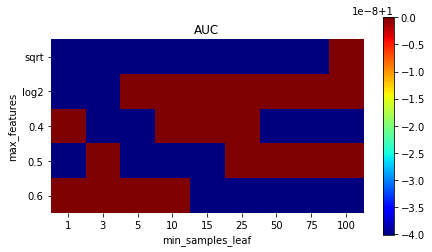

In [16]:
plotScores(rf_scores, rf_paramGrid, 'AUC')

In [17]:
getBestModel(rf_models, rf_scores, greater_is_better=True)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [18]:
getBestScore(rf_scores, greater_is_better=True)

1.0000000000000002

Or in one line of code!

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  35 out of  45 | elapsed:    2.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  40 out of  45 | elapsed:    2.3s remaining:    0.3s


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done  30 out of  45 | elapsed:    0.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.9s finished


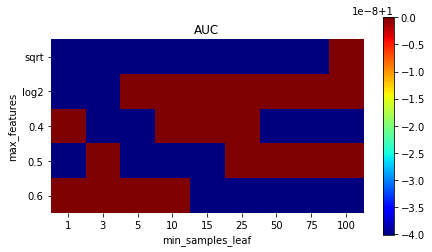

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 1.0


In [19]:
rf_bestModel, rf_bestScore, rf_allModels, rf_allScores = bestFit(RandomForestClassifier(), rf_paramGrid, 
                                                   X_train, y_train, X_val, y_val, 
                                                   metric=roc_auc_score,  greater_is_better=True, 
                                                   scoreLabel = 'AUC')
print(rf_bestModel, rf_bestScore)

### Varying three parameters (Gradient Boosting Classifier)

In [20]:
gbm_grid = {
    'learning_rate' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'subsample': np.linspace(0.5,1 ,6),
    'min_samples_leaf': [1,3,5,10,15,25,50]
}
gbm_paramGrid = ParameterGrid(gbm_grid)

In [21]:
gbm_models = fitModels(GradientBoostingClassifier(), gbm_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   14.3s
[Paralle

In [22]:
gbm_scores = scoreModels(gbm_models, X_val, y_val, metric=roc_auc_score)

[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:    1.0s finished


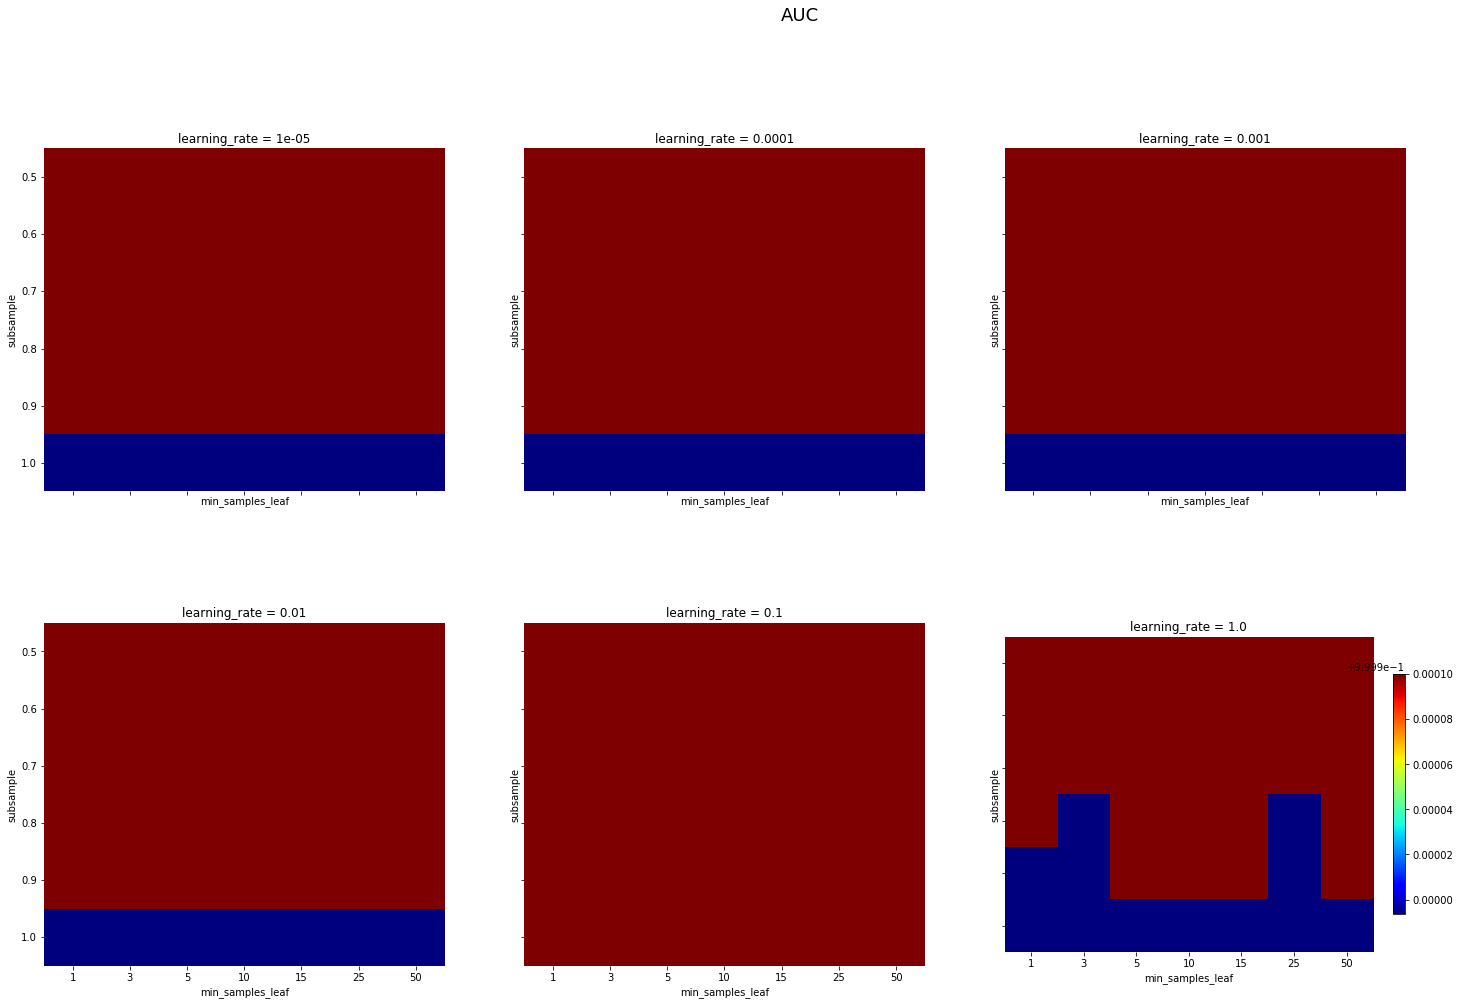

In [23]:
plotScores(gbm_scores, gbm_paramGrid, scoreLabel = 'AUC')

In [24]:
getBestModel(gbm_models, gbm_scores, greater_is_better=True)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1e-05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

In [25]:
getBestScore(gbm_scores, greater_is_better=True)

1.0

Or, in one line of code!

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   16.4s
[Paralle

-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:   18.3s finished
[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:    1.1s finished


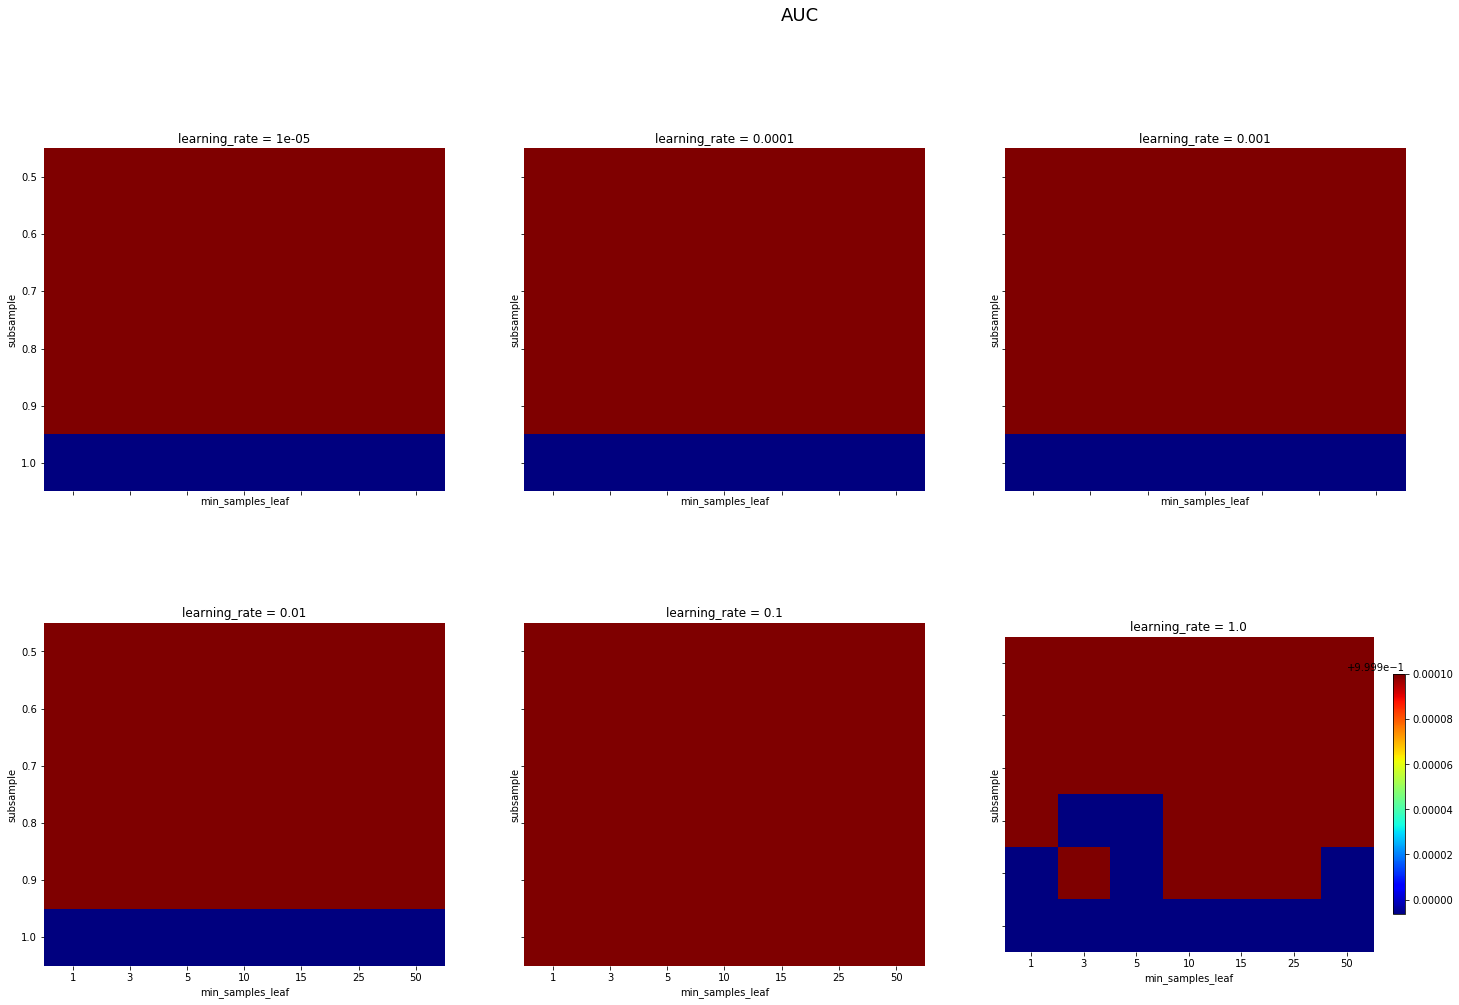

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1e-05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False) 1.0


In [26]:
gbm_bestModel, gbm_bestScore, gbm_allModels, gbm_allScores = bestFit(GradientBoostingClassifier(), gbm_paramGrid,
                                                                    X_train, y_train, X_val, y_val,
                                                                    metric=roc_auc_score, greater_is_better=True,
                                                                    scoreLabel="AUC")
print(gbm_bestModel, gbm_bestScore)

## Regression Models

### Generating data

In [27]:
X_train = pd.DataFrame({'x_norm': np.random.normal(0,1,10000), 'x_unif': np.random.uniform(-1,1,10000), 'x_exp': np.random.exponential(1, 10000)})
y_train = np.random.normal(0,1,10000)
X_val = pd.DataFrame({'x_norm': np.random.normal(0,1,10000), 'x_unif': np.random.uniform(-1,1,10000), 'x_exp': np.random.exponential(1, 10000)})
y_val = np.random.normal(0,1,10000)

In [28]:
X_train.head()

,x_exp,x_norm,x_unif
0,0.482021,0.152005,-0.888597
1,1.351510,-0.893932,0.091099
2,0.592911,0.189677,0.186971
3,0.079627,-0.391554,0.797229
4,0.589346,0.656685,0.645357


In [29]:
y_train[0:5]

array([0.43192177, 2.38509561, 2.02871427, 0.71787779, 1.36754641])

### Varying one parameter (Ridge Regression)

In [30]:
ridge_grid = {
    'alpha': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
             1e-4, 1e-3, 1e-2, 1e-1, 1e0,
             1e1, 1e2, 1e3, 1e4, 1e5,
             1e6, 1e7, 1e8, 1e9, 1e10],
}
ridge_paramGrid = ParameterGrid(ridge_grid)

In [31]:
ridge_models = fitModels(Ridge(), ridge_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0089s.) Setting batch_size=44.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished


In [32]:
ridge_scores = scoreModels(ridge_models, X_val, y_val, mean_squared_error, predict_proba=False)

[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished


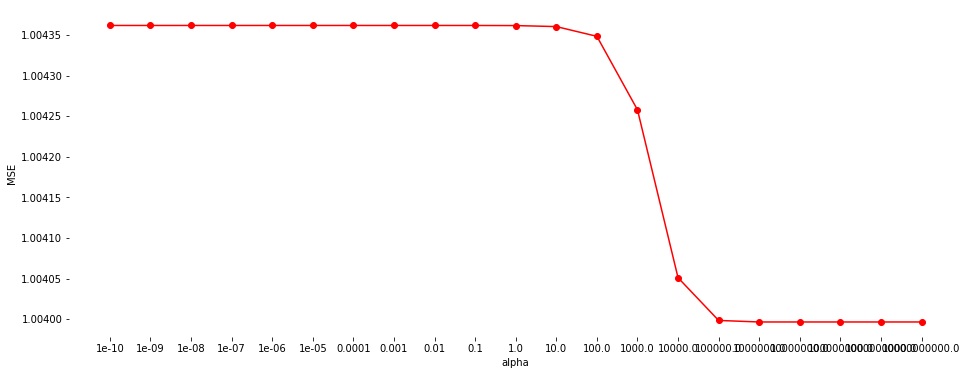

In [33]:
plotScores(ridge_scores, ridge_paramGrid, "MSE")

In [34]:
getBestModel(ridge_models, ridge_scores, greater_is_better=False)

Ridge(alpha=10000000000.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [35]:
getBestScore(ridge_scores, greater_is_better=False)

1.0039966422038606

Or in one line of code!

-------------FITTING MODELS-------------
-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0100s.) Setting batch_size=40.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished


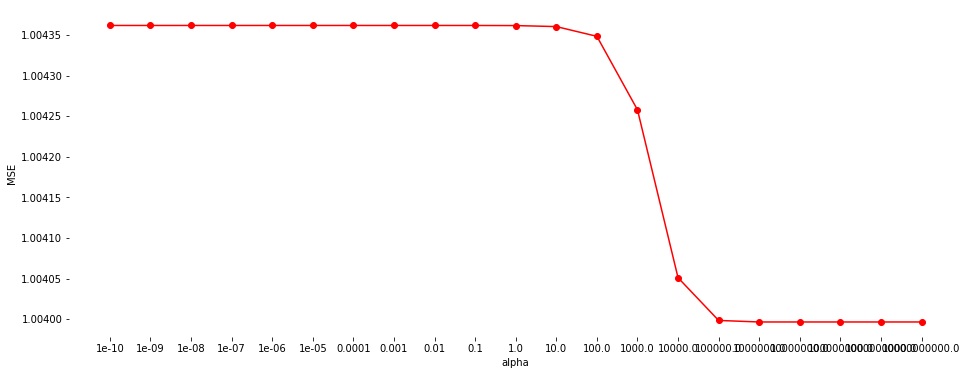

Ridge(alpha=1e-10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) 1.0043617795037487


In [36]:
ridge_bestModel, ridge_bestScore, ridge_allModels, ridge_allScores = bestFit(Ridge(), ridge_paramGrid, 
                                                            X_train, y_train, X_val, y_val, 
                                                            metric=mean_squared_error, greater_is_better=True, 
                                                            predict_proba=False, scoreLabel = 'MSE')
print(ridge_bestModel, ridge_bestScore)

### Varying two parameters (Elastic Net + Random Forest Regressor)

#### ElasticNet

In [37]:
en_grid = {
    'alpha': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
             1e-4, 1e-3, 1e-2, 1e-1, 1e0,
             1e1, 1e2, 1e3, 1e4, 1e5,
             1e6, 1e7, 1e8, 1e9, 1e10],
    'l1_ratio': np.linspace(0,1,21)
}
en_paramGrid = ParameterGrid(en_grid)

In [38]:
en_models = fitModels(ElasticNet(), en_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Batch computation too fast (0.0233s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 175 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:    4.6s finished


In [39]:
en_scores = scoreModels(en_models, X_val, y_val, mean_squared_error, predict_proba=False)

[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:    0.3s finished


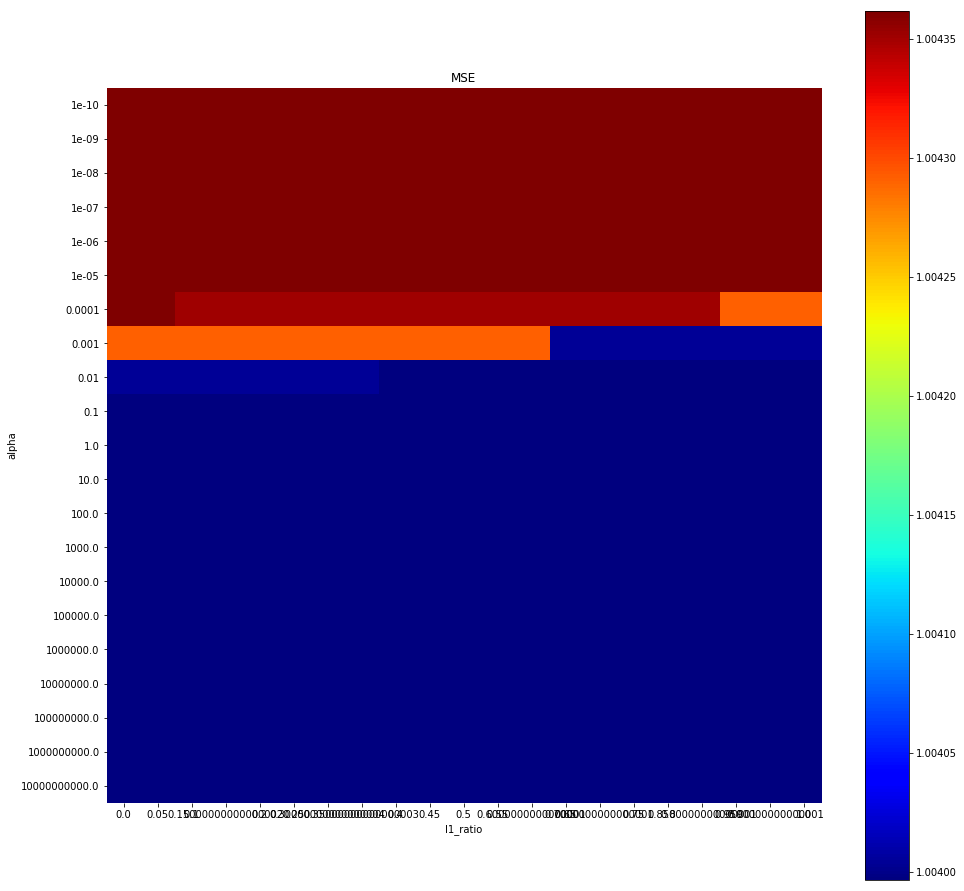

In [40]:
plotScores(en_scores, en_paramGrid, "MSE")

In [41]:
getBestModel(en_models, en_scores, greater_is_better=False)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [42]:
getBestScore(en_scores, greater_is_better=False)

1.00399664219822

Or in one line of code!

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Batch computation too fast (0.0565s.) Setting batch_size=6.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1525s.) Setting batch_size=14.
[Parallel(n_jobs=-1)]: Done  75 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 177 tasks      | elapsed:    1.7s


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Done 441 out of 441 | elapsed:    0.2s finished


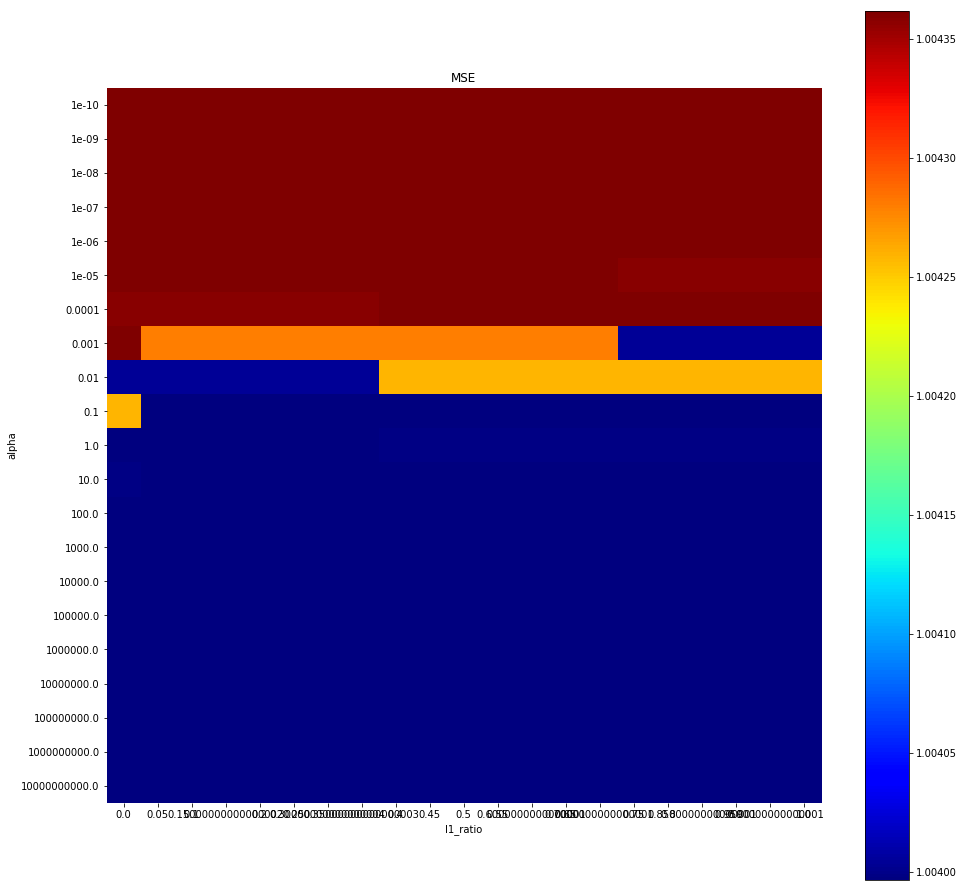

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True,
      l1_ratio=0.7000000000000001, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 1.00399664219822


In [43]:
en_bestModel, en_bestScore, en_allModels, en_allScores = bestFit(ElasticNet(), en_paramGrid, 
                                                   X_train, y_train, X_val, y_val, 
                                                   metric=mean_squared_error,  greater_is_better=False,
                                                   predict_proba=False, scoreLabel = 'MSE')
print(en_bestModel, en_bestScore)

#### RandomForestRegressor

In [44]:
rf_grid = {
    'n_estimators': [50],
    'min_samples_leaf': [1,3,5,10,15,25,50,75,100,125,150,175,200,250,300,400,500],
    'max_features': ['sqrt', 'log2', 0.4, 0.5, 0.6],
    'n_jobs': [-1]
}
rf_paramGrid = ParameterGrid(rf_grid)

In [45]:
rfreg_models = fitModels(RandomForestRegressor(), rf_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  79 out of  85 | elapsed:    8.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    8.5s finished


In [46]:
rfreg_scores = scoreModels(rfreg_models, X_val, y_val, mean_squared_error, predict_proba=False)

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    2.2s finished


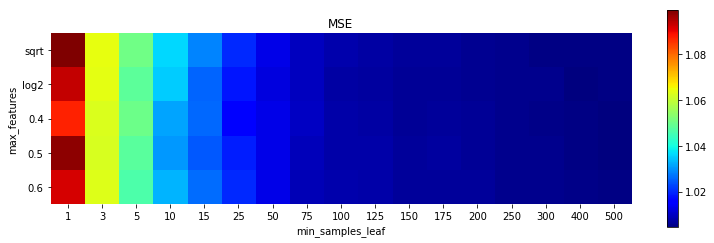

In [47]:
plotScores(rfreg_scores, rf_paramGrid, "MSE")

In [48]:
getBestModel(rfreg_models, rfreg_scores, greater_is_better=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=500, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [49]:
getBestScore(rfreg_scores, greater_is_better=False)

1.004492098196199

Or in one line of code!

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  79 out of  85 | elapsed:    7.8s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    8.2s finished


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  85 out of  85 | elapsed:    2.1s finished


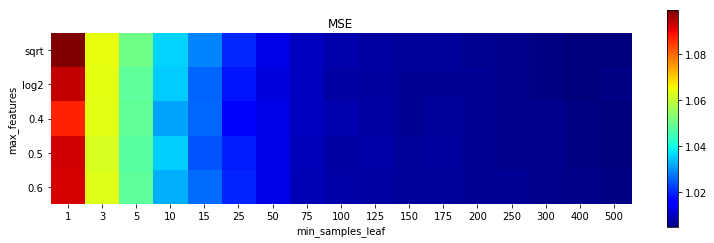

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=500, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False) 1.0045707971909335


In [50]:
rfreg_bestModel, rfreg_bestScore, rfreg_allModels, rfreg_allScores = bestFit(RandomForestRegressor(), rf_paramGrid, 
                                                            X_train, y_train, X_val, y_val, 
                                                            metric=mean_squared_error, greater_is_better=False,
                                                            predict_proba=False, scoreLabel = 'MSE')
print(rfreg_bestModel, rfreg_bestScore)

### Varying three parameters (Gradient Boosting Regressor)

In [51]:
gbm_grid = {
    'learning_rate' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'subsample': np.linspace(0.5,1 ,6),
    'min_samples_leaf': [1,3,5,10,15,25,50]
}
gbm_paramGrid = ParameterGrid(gbm_grid)

In [52]:
gbmreg_models = fitModels(GradientBoostingRegressor(), gbm_paramGrid, X_train, y_train)

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   15.5s
[Paralle

In [53]:
gbmreg_scores = scoreModels(gbmreg_models, X_val, y_val, metric=mean_squared_error,predict_proba=False)

[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:    1.1s finished


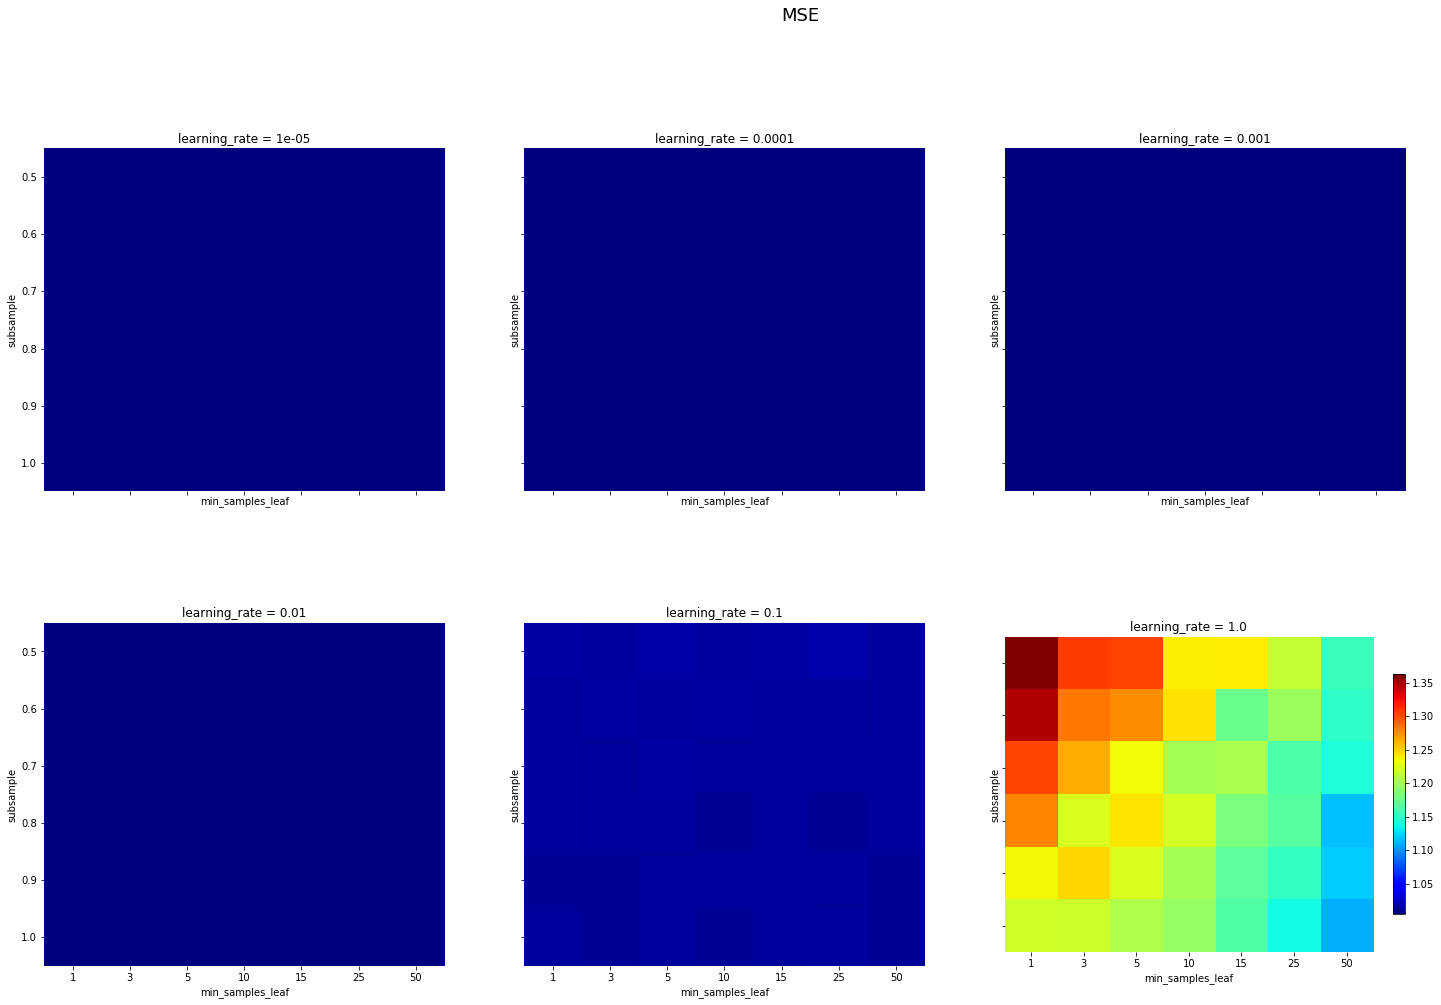

In [54]:
plotScores(gbmreg_scores, gbm_paramGrid, scoreLabel = 'MSE')

In [55]:
getBestModel(gbmreg_models, gbmreg_scores, greater_is_better=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.001, loss='ls', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [56]:
getBestScore(gbmreg_scores, greater_is_better=False)

1.0039463873175043

Or, in one line code!

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   15.5s
[Paralle

-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done 252 out of 252 | elapsed:    1.1s finished


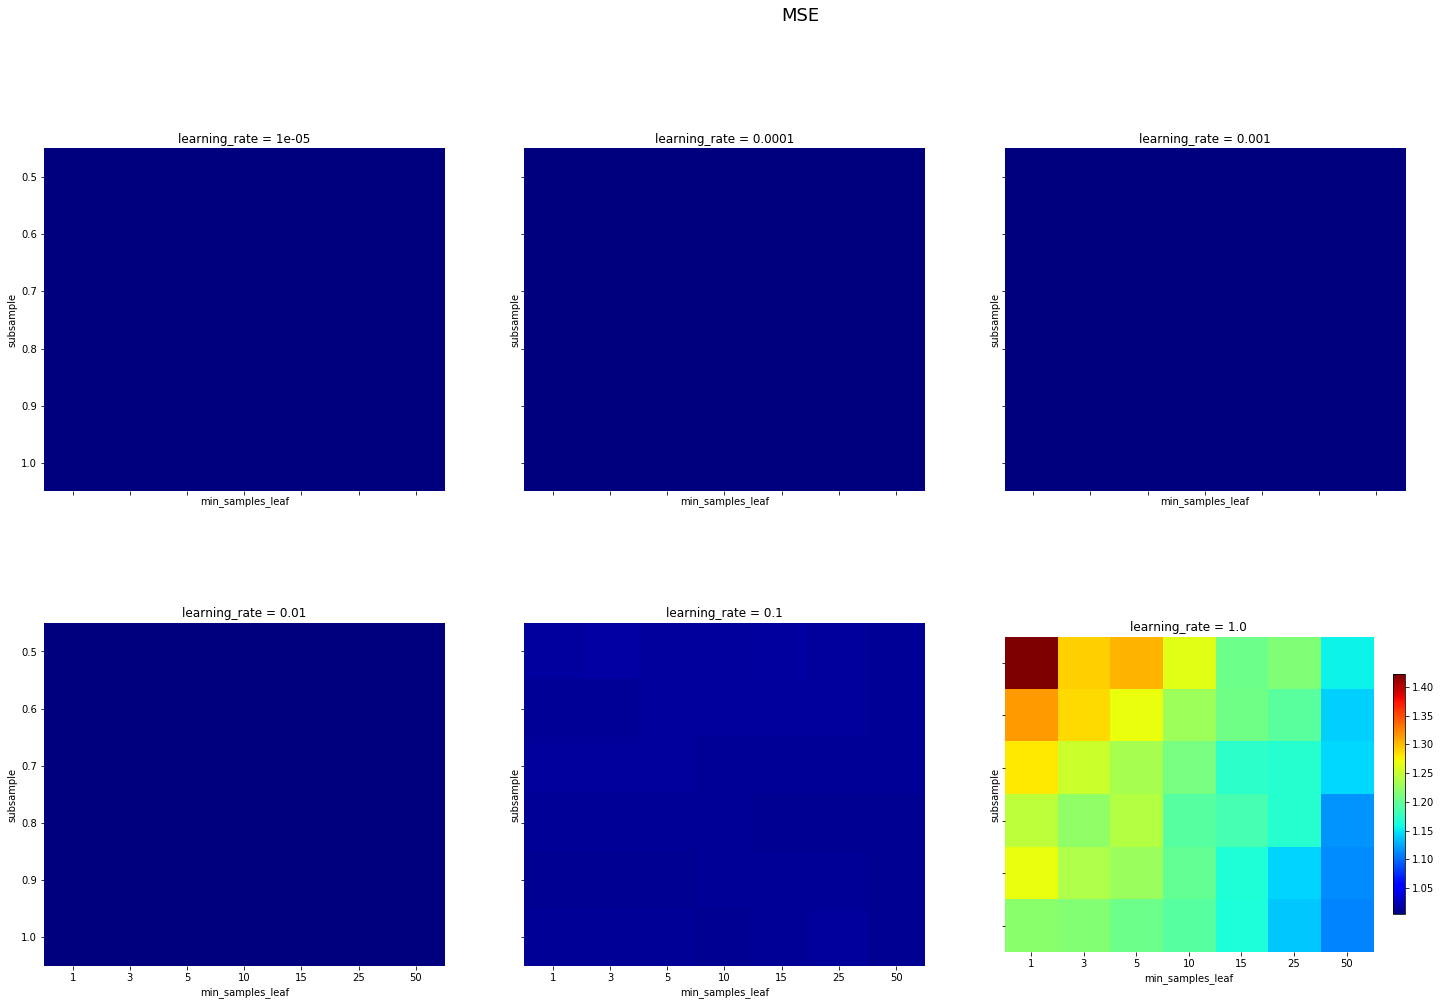

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.001, loss='ls', max_depth=3,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False) 1.0039463873175043


In [57]:
gbmreg_bestModel, gbmreg_bestScore, gbmreg_allModels, gbmreg_allScores = bestFit(GradientBoostingRegressor(), gbm_paramGrid,
                                                                    X_train, y_train, X_val, y_val,
                                                                    metric=mean_squared_error, greater_is_better=False,
                                                                    predict_proba=False, scoreLabel="MSE")
print(gbmreg_bestModel, gbmreg_bestScore)

# Cross-validation

## Classification Models

### Generating data

In [58]:
X_train = pd.DataFrame({'x_norm': np.random.normal(0,1,10000), 'x_unif': np.random.uniform(-1,1,10000), 'x_exp': np.random.exponential(1, 10000)})
y_train = np.asarray([1 if xMax > 1 else 0 for xMax in np.max(X_train, axis=1)])

In [59]:
X_train.head()

,x_exp,x_norm,x_unif
0,0.175669,-0.998834,-0.184792
1,0.031074,1.102917,-0.227192
2,1.449118,0.369817,0.909271
3,0.904616,-0.396770,0.433767
4,1.220547,-1.368905,-0.983881


In [60]:
y_train[0:5]

array([0, 1, 1, 0, 1])

### Varying one parameter (LogisticRegression)

In [61]:
lr_grid = {
    'C': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
             1e-4, 1e-3, 1e-2, 1e-1, 1e0,
             1e1, 1e2, 1e3, 1e4, 1e5,
             1e6, 1e7, 1e8, 1e9, 1e10],
    'penalty': ['l2'],
    'n_jobs': [-1]
}
lr_paramGrid = ParameterGrid(lr_grid)

In [62]:
lr_scores, lr_models = crossvalModels(LogisticRegression(), lr_paramGrid, X_train, y_train, 
                           nfolds=5, metric=recall_score, predict_proba=False)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Paral

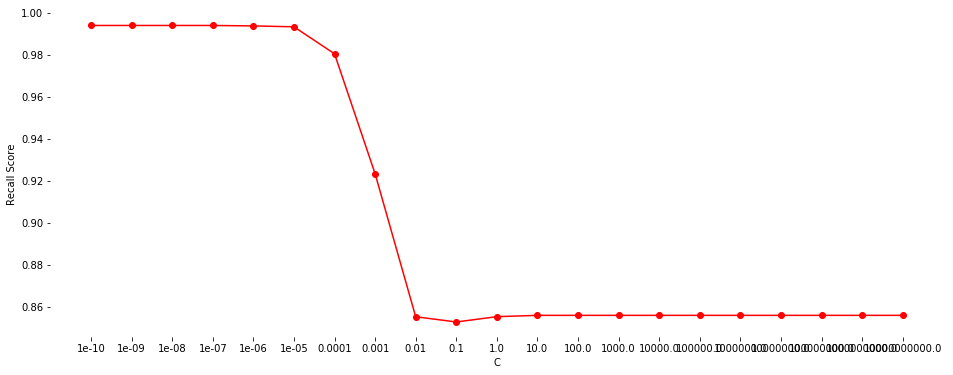

In [63]:
plotScores(lr_scores, lr_paramGrid, 'Recall Score')

In [64]:
getBestModel(lr_models, lr_scores, greater_is_better=True)

{'C': 1e-10, 'n_jobs': -1, 'penalty': 'l2'}

In [65]:
getBestScore(lr_scores, greater_is_better=True)

0.9939165211533082

Or, in one line of code!

-------------CROSS-VALIDATING MODELS-------------


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Paral

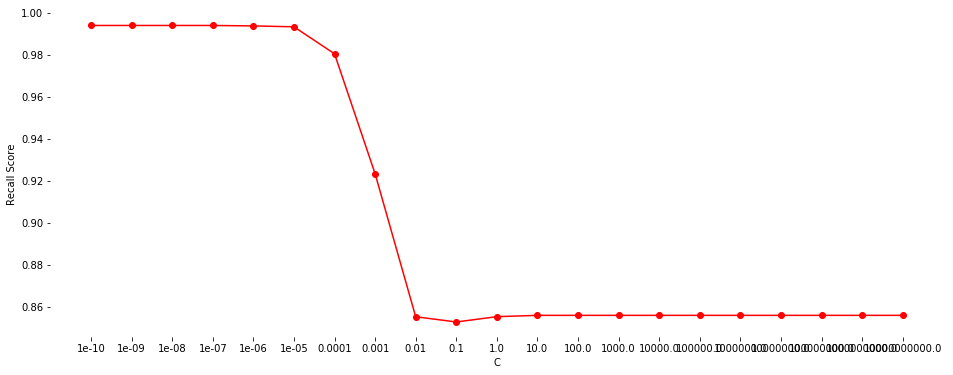

{'C': 1e-10, 'n_jobs': -1, 'penalty': 'l2'} 0.9939165211533082


In [66]:
lr_bestModel, lr_bestScore, lr_allModels, lr_allScores = bestFit(LogisticRegression(), lr_paramGrid, 
                                                   X_train, y_train, nfolds=5,
                                                   metric=recall_score, greater_is_better=True, 
                                                   predict_proba=False, scoreLabel = 'Recall Score')
print(lr_bestModel, lr_bestScore)

### Varying two parameters (Random Forest Classifier)

In [67]:
rf_grid = {
    'n_estimators': [50],
    'min_samples_leaf': [1,3,5,10,15,25,50,75,100],
    'max_features': ['sqrt', 'log2', 0.4, 0.5, 0.6],
    'n_jobs': [-1]
}
rf_paramGrid = ParameterGrid(rf_grid)

In [68]:
rf_scores, rf_models = crossvalModels(RandomForestClassifier(), rf_paramGrid, X_train, y_train,
                          nfolds=5, metric=roc_auc_score, predict_proba=True)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_job

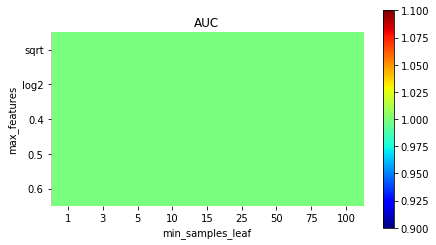

In [69]:
plotScores(rf_scores, rf_paramGrid, 'AUC')

In [70]:
getBestModel(rf_models, rf_scores, greater_is_better=True)

{'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 50,
 'n_jobs': -1}

In [71]:
getBestScore(rf_scores, greater_is_better=True)

1.0

Or in one line of code!

-------------CROSS-VALIDATING MODELS-------------


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_job

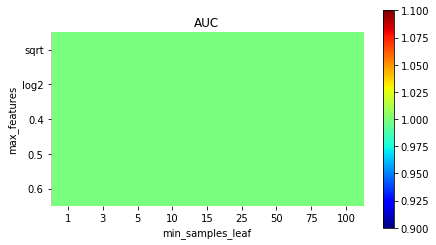

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 50, 'n_jobs': -1} 1.0


In [72]:
rf_bestModel, rf_bestScore, rf_allModels, rf_allScores = bestFit(RandomForestClassifier(), rf_paramGrid, 
                                                   X_train, y_train, nfolds=5,
                                                   metric=roc_auc_score, greater_is_better=True, 
                                                   scoreLabel = 'AUC')
print(rf_bestModel, rf_bestScore)

### Varying three parameters (Gradient Boosting Classifier)

In [73]:
gbm_grid = {
    'learning_rate' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'subsample': np.linspace(0.5,1 ,6),
    'min_samples_leaf': [1,3,5,10,15,25,50]
}
gbm_paramGrid = ParameterGrid(gbm_grid)

In [74]:
gbm_scores, gbm_models = crossvalModels(GradientBoostingClassifier(), gbm_paramGrid, X_train, y_train,
                           nfolds=5, metric=roc_auc_score, predict_proba=True)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: D

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_job

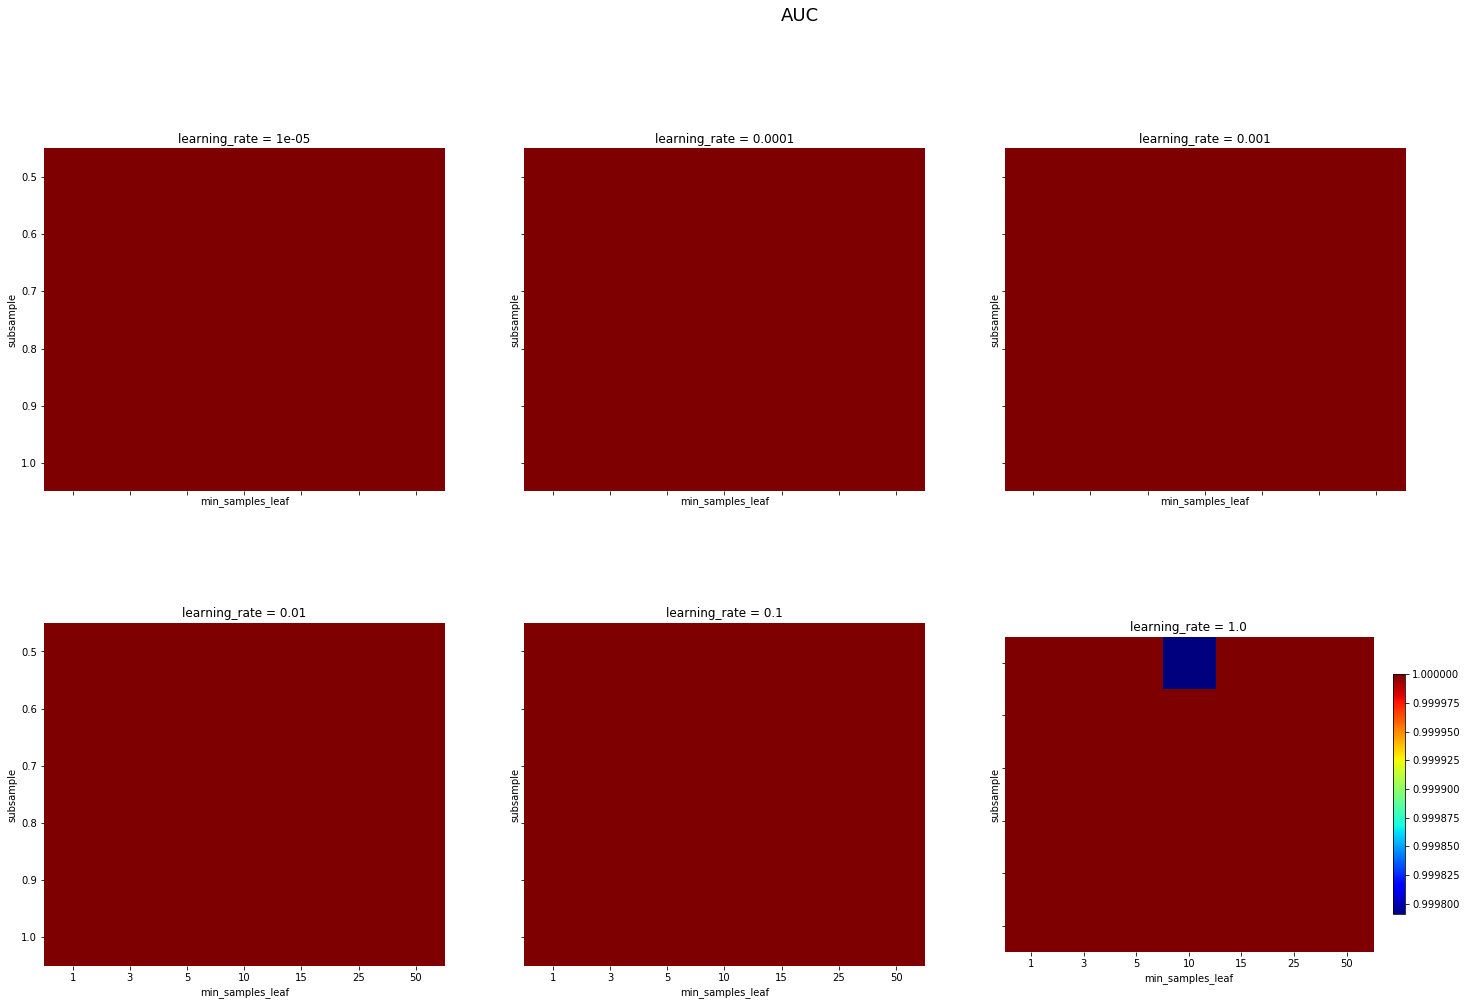

In [75]:
plotScores(gbm_scores, gbm_paramGrid, scoreLabel = 'AUC')

In [76]:
getBestModel(gbm_models, gbm_scores, greater_is_better=True)

{'learning_rate': 1e-05, 'min_samples_leaf': 1, 'subsample': 0.5}

In [77]:
getBestScore(gbm_scores, greater_is_better=True)

1.0

Or, in one line of code!

-------------CROSS-VALIDATING MODELS-------------


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: D

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.8s finished
[Parallel(n_job

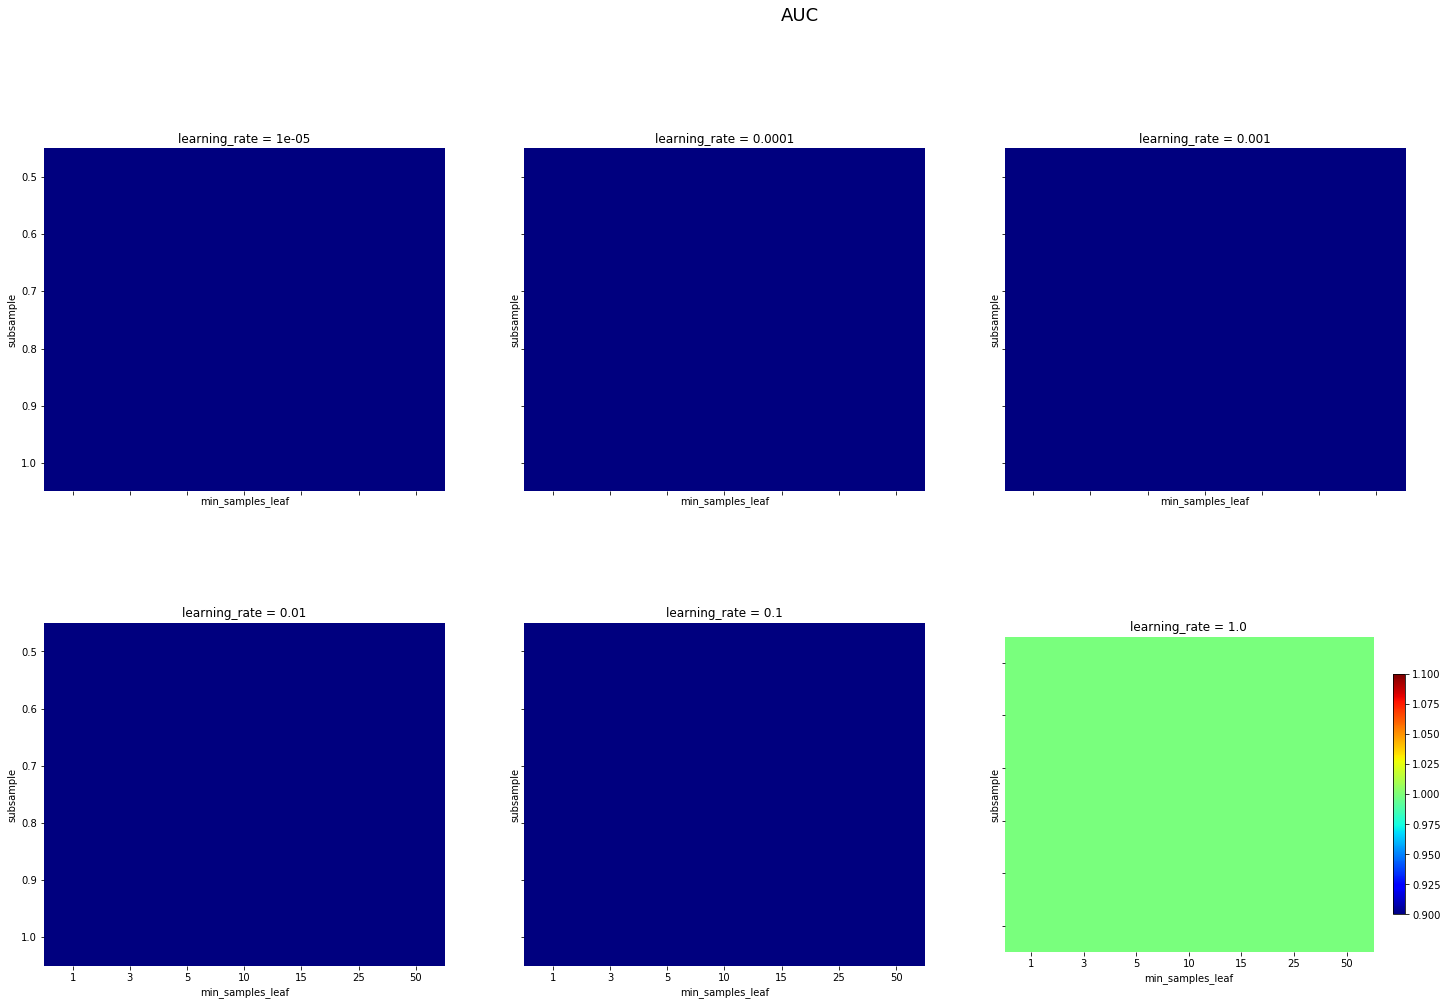

{'learning_rate': 1e-05, 'min_samples_leaf': 1, 'subsample': 0.5} 1.0


In [78]:
gbm_bestModel, gbm_bestScore, gbm_allModels, gbm_allScores = bestFit(GradientBoostingClassifier(), gbm_paramGrid,
                                                                    X_train, y_train, nfolds=5,
                                                                    metric=roc_auc_score, greater_is_better=True,
                                                                    scoreLabel="AUC")
print(gbm_bestModel, gbm_bestScore)

## Regression Models

### Generating data

In [79]:
X_train = pd.DataFrame({'x_norm': np.random.normal(0,1,10000), 'x_unif': np.random.uniform(-1,1,10000), 'x_exp': np.random.exponential(1, 10000)})
y_train = np.random.normal(0,1,10000)

In [80]:
X_train.head()

,x_exp,x_norm,x_unif
0,3.735273,-1.912946,0.043390
1,2.028812,-0.858602,0.313954
2,1.299185,-1.257041,-0.877643
3,0.772981,0.784982,-0.506520
4,0.139401,-0.691221,0.062689


In [81]:
y_train[0:5]

array([-2.38230435, -1.77750105,  0.63400644,  0.87051289, -1.92944164])

### Varying one parameter (Ridge Regression)

In [82]:
ridge_grid = {
    'alpha': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
             1e-4, 1e-3, 1e-2, 1e-1, 1e0,
             1e1, 1e2, 1e3, 1e4, 1e5,
             1e6, 1e7, 1e8, 1e9, 1e10],
}
ridge_paramGrid = ParameterGrid(ridge_grid)

In [83]:
ridge_scores, ridge_models = crossvalModels(Ridge(), ridge_paramGrid, X_train, y_train,
                             nfolds=5, metric=mean_squared_error, predict_proba=False)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Paral

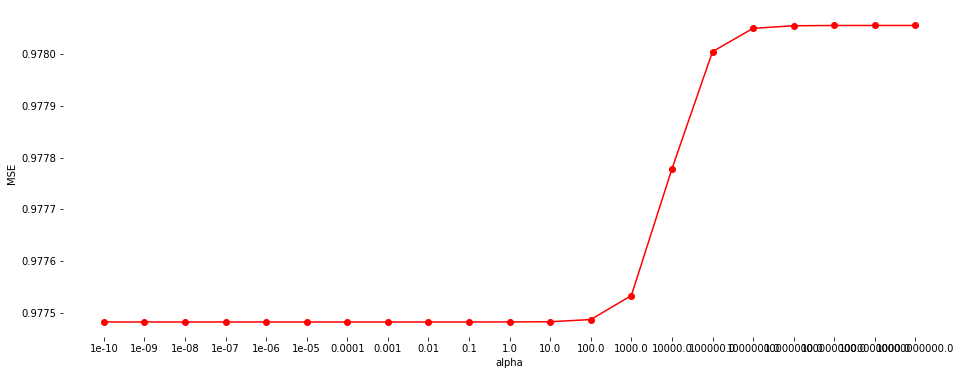

In [84]:
plotScores(ridge_scores, ridge_paramGrid, "MSE")

In [85]:
getBestModel(ridge_models, ridge_scores, greater_is_better=False)

{'alpha': 1e-10}

In [86]:
getBestScore(ridge_scores, greater_is_better=False)

0.9774826798287961

Or in one line of code!

-------------CROSS-VALIDATING MODELS-------------


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_job

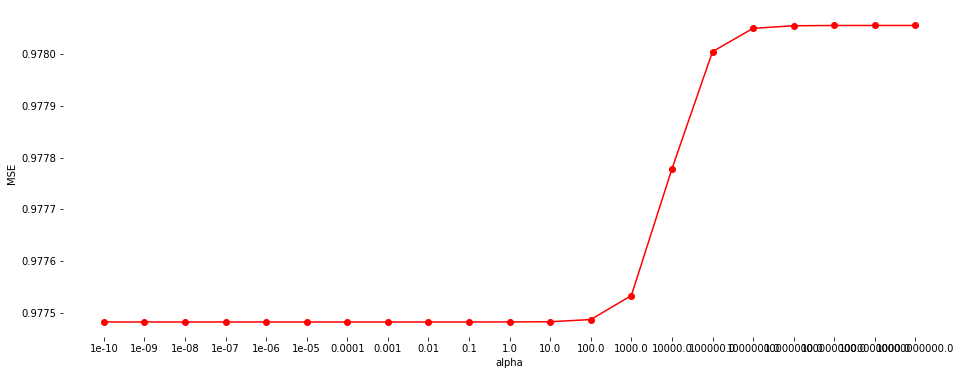

{'alpha': 1e-10} 0.9774826798287961


In [87]:
ridge_bestModel, ridge_bestScore, ridge_allModels, ridge_allScores = bestFit(Ridge(), ridge_paramGrid, 
                                                            X_train, y_train, nfolds=5,
                                                            metric=mean_squared_error, greater_is_better=False, 
                                                            predict_proba=False, scoreLabel = 'MSE')
print(ridge_bestModel, ridge_bestScore)

### Varying two parameters (Elastic Net + Random Forest Regressor)

#### ElasticNet

In [88]:
en_grid = {
    'alpha': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5,
             1e-4, 1e-3, 1e-2, 1e-1, 1e0,
             1e1, 1e2, 1e3, 1e4, 1e5,
             1e6, 1e7, 1e8, 1e9, 1e10],
    'l1_ratio': np.linspace(0,1,21)
}
en_paramGrid = ParameterGrid(en_grid)

In [89]:
en_scores, en_models = crossvalModels(ElasticNet(), en_paramGrid, X_train, y_train,
                                     nfolds=5, metric=mean_squared_error, predict_proba=False)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: D

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Paral

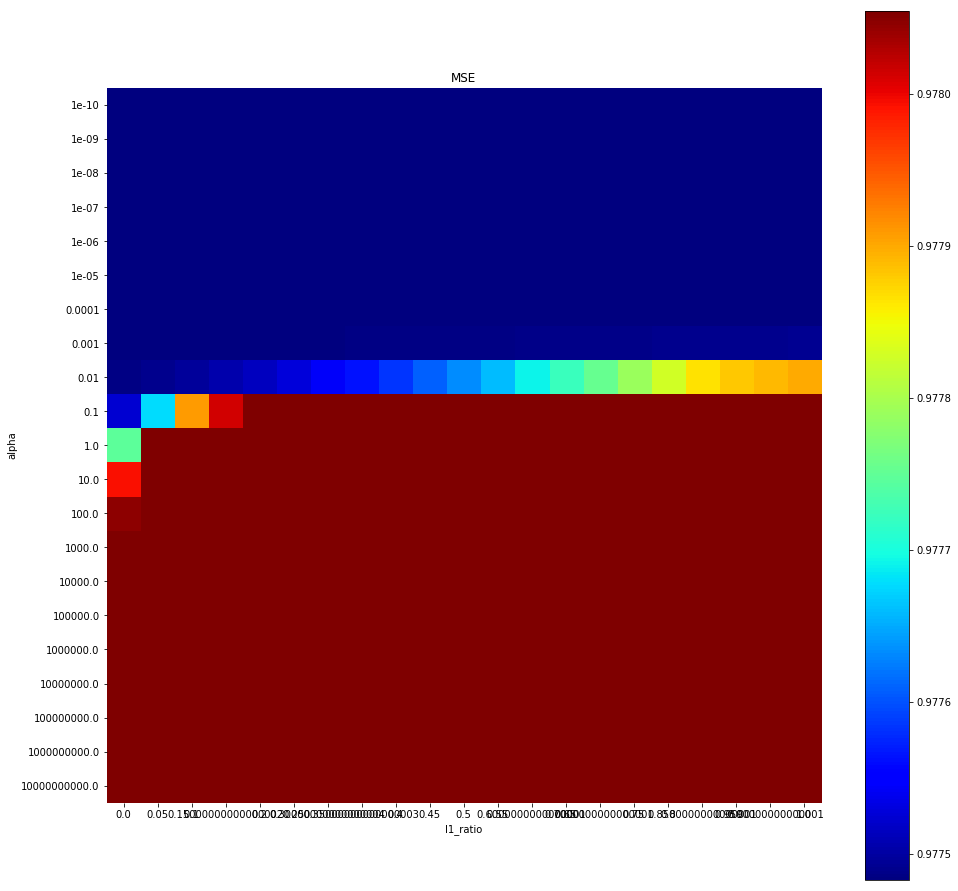

In [90]:
plotScores(en_scores, en_paramGrid, "MSE")

In [91]:
getBestModel(en_models, en_scores, greater_is_better=False)

{'alpha': 1e-10, 'l1_ratio': 0.0}

In [92]:
getBestScore(en_scores, greater_is_better=False)

0.9774826798288323

Or in one line of code!

-------------CROSS-VALIDATING MODELS-------------


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1529s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Paral

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done 219 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Done 325 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.6s finished
[Parallel(n_job

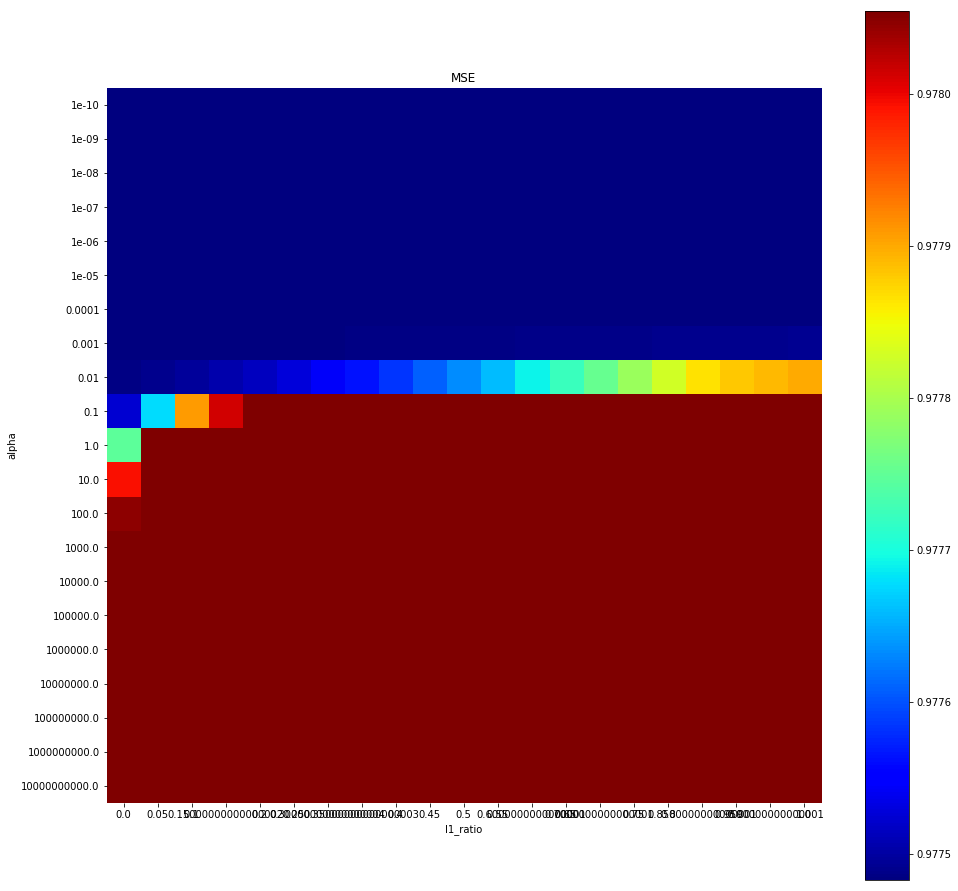

{'alpha': 1e-10, 'l1_ratio': 0.0} 0.9774826798288323


In [93]:
en_bestModel, en_bestScore, en_allModels, en_allScores = bestFit(ElasticNet(), en_paramGrid, 
                                                   X_train, y_train, nfolds=5, 
                                                   metric=mean_squared_error, greater_is_better=False,
                                                   predict_proba=False, scoreLabel = 'MSE')
print(en_bestModel, en_bestScore)

#### RandomForestRegressor

In [94]:
rf_grid = {
    'n_estimators': [50],
    'min_samples_leaf': [1,3,5,10,15,25,50,75,100,125,150,175,200,250,300,400,500],
    'max_features': ['sqrt', 'log2', 0.4, 0.5, 0.6],
    'n_jobs': [-1]
}
rf_paramGrid = ParameterGrid(rf_grid)

In [95]:
rfreg_scores, rfreg_models = crossvalModels(RandomForestRegressor(), rf_paramGrid, X_train, y_train,
                             nfolds=5, metric=mean_squared_error, predict_proba=False)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_job

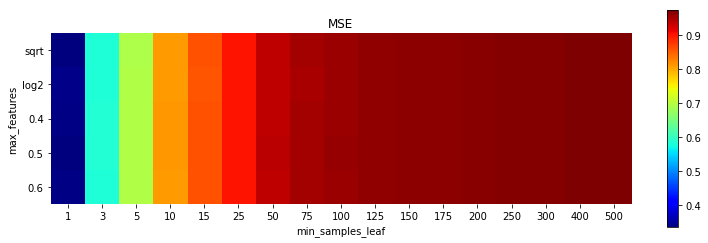

In [96]:
plotScores(rfreg_scores, rf_paramGrid, "MSE")

In [97]:
getBestModel(rfreg_models, rfreg_scores, greater_is_better=False)

{'max_features': 0.5, 'min_samples_leaf': 1, 'n_estimators': 50, 'n_jobs': -1}

In [98]:
getBestScore(rfreg_scores, greater_is_better=False)

0.3334346012278666

Or in one line of code!

-------------CROSS-VALIDATING MODELS-------------


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished
[Parallel(n_job

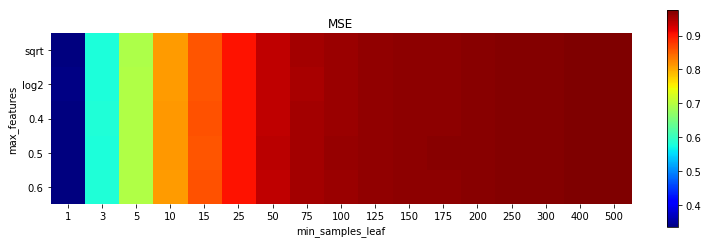

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 50, 'n_jobs': -1} 0.335417704894505


In [99]:
rfreg_bestModel, rfreg_bestScore, rfreg_allModels, rfreg_allScores = bestFit(RandomForestRegressor(), rf_paramGrid, 
                                                            X_train, y_train, nfolds=5,
                                                            metric=mean_squared_error, greater_is_better=False,
                                                            predict_proba=False, scoreLabel = 'MSE')
print(rfreg_bestModel, rfreg_bestScore)

### Varying three parameters (Gradient Boosting Regressor)

In [100]:
gbm_grid = {
    'learning_rate' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
    'subsample': np.linspace(0.5,1 ,6),
    'min_samples_leaf': [1,3,5,10,15,25,50]
}
gbm_paramGrid = ParameterGrid(gbm_grid)

In [107]:
gbmreg_scores, gbmreg_models = crossvalModels(GradientBoostingRegressor(), gbm_paramGrid, X_train, y_train,
                              nfolds=5, metric=mean_squared_error, predict_proba=False)

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_job

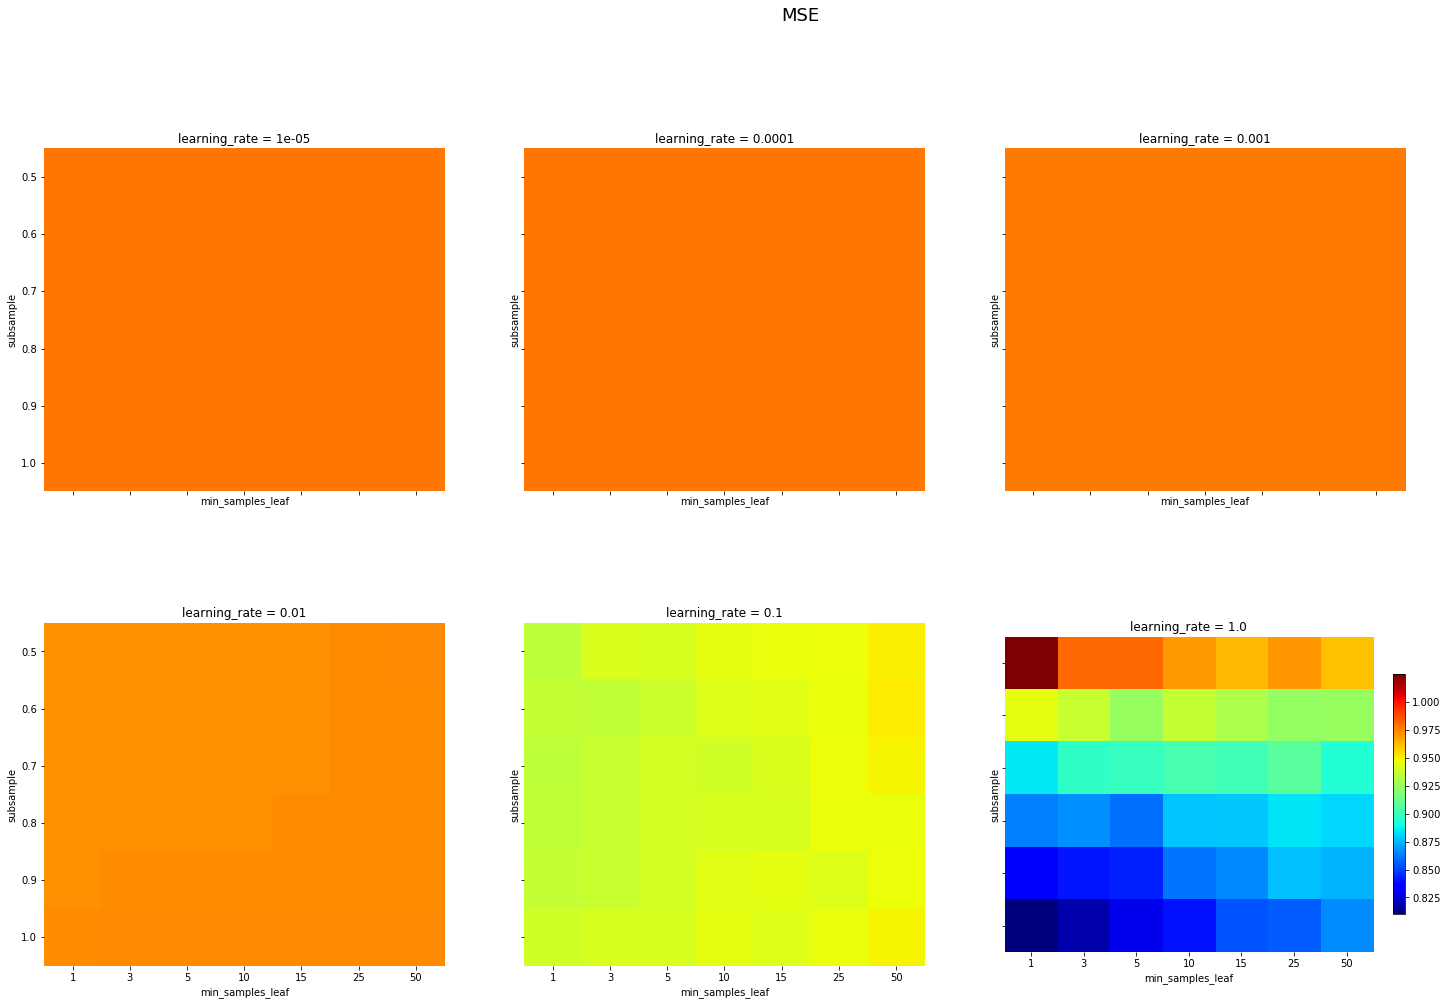

In [108]:
plotScores(gbmreg_scores, gbm_paramGrid, scoreLabel = 'MSE')

In [109]:
getBestModel(gbmreg_models, gbmreg_scores, greater_is_better=False)

{'learning_rate': 1.0, 'min_samples_leaf': 1, 'subsample': 1.0}

In [110]:
getBestScore(gbmreg_scores, greater_is_better=False)

0.8098434524489688

Or, in one line code!

-------------CROSS-VALIDATING MODELS-------------


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.9s finished
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.1s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.0s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished
[Parallel(n_job

[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Done 226 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.4s finished
[Parallel(n_job

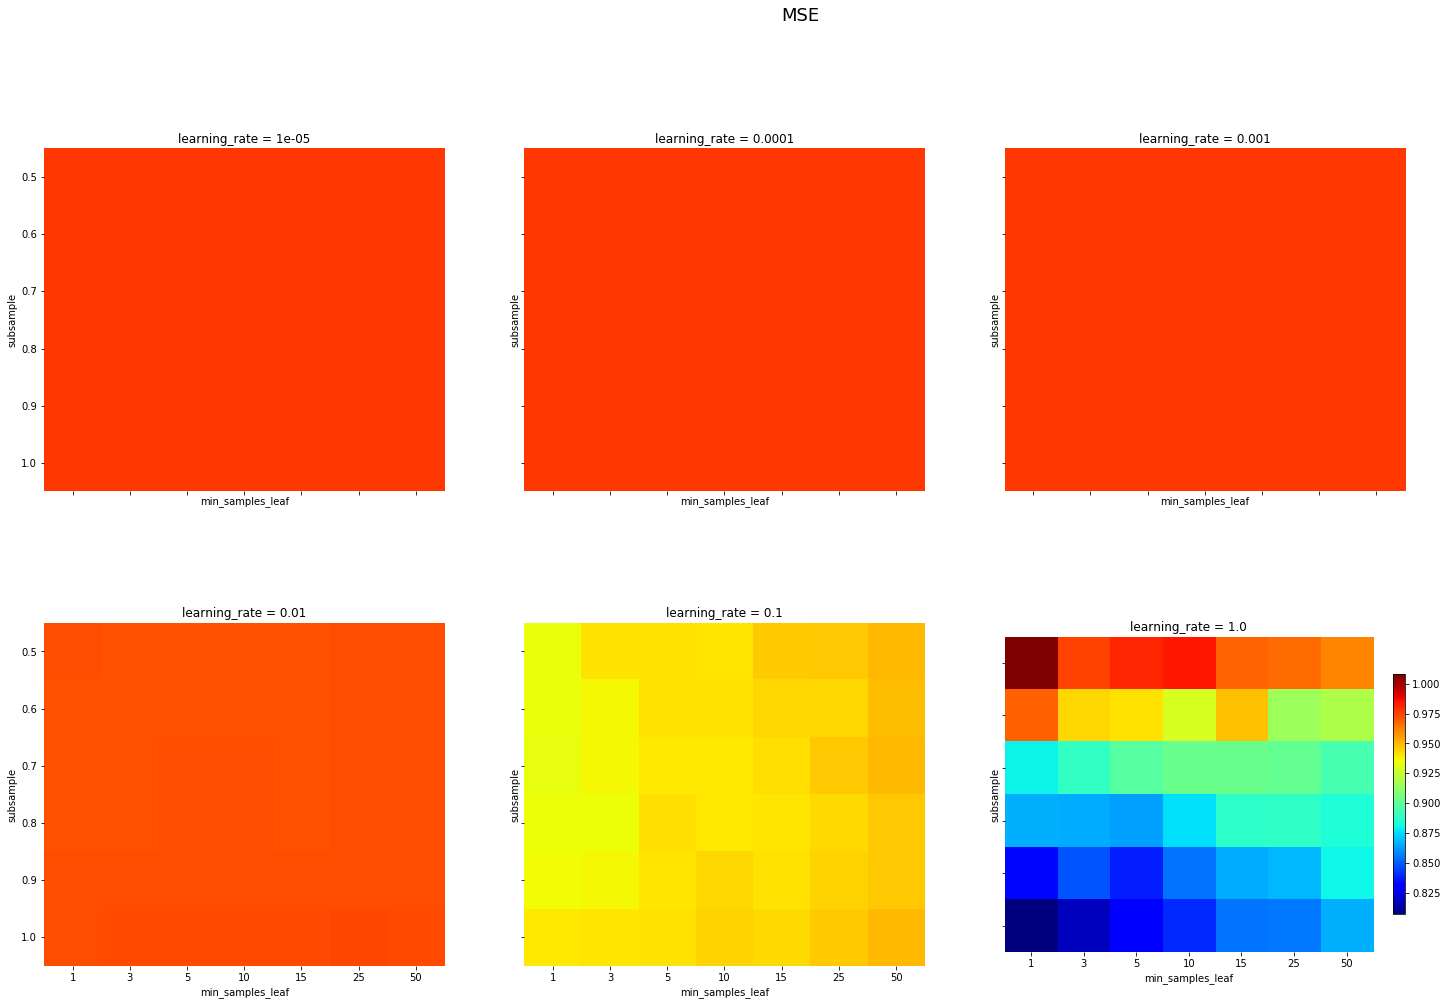

{'learning_rate': 1.0, 'min_samples_leaf': 1, 'subsample': 1.0} 0.8068419715612446


In [105]:
gbmreg_bestModel, gbmreg_bestScore, gbmreg_allModels, gbmreg_allScores = bestFit(GradientBoostingRegressor(), gbm_paramGrid,
                                                                    X_train, y_train, nfolds=5,
                                                                    metric=mean_squared_error, greater_is_better=False,
                                                                    predict_proba=False, scoreLabel="MSE")
print(gbmreg_bestModel, gbmreg_bestScore)